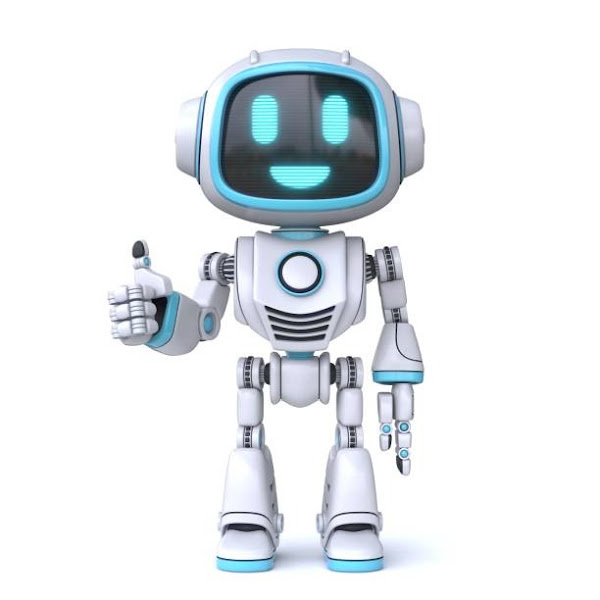

# Follow my instagram : https://www.instagram.com/xsocialandapps/

# Installation

In [ ]:
# FacePoke Setup on Google Colab

# Step 1: Set up the environment and clone the repository
%cd /content
!git lfs install
!git clone https://github.com/zachysaur/FacePoke.git
%cd FacePoke

# Step 2: Install Python dependencies
# Ensure that the required version of Python is available
# (Colab uses Python 3.8 by default, but we will attempt with it first)
!pip install --upgrade -r requirements.txt

# Step 3: Install frontend dependencies using Bun
# Bun may not be installed on Colab by default, so install it first
!curl -fsSL https://bun.sh/install | bash
# Restart the shell to make Bun available
import os
os.environ["PATH"] += ":/root/.bun/bin"

# Move to the client directory to install Bun dependencies and build the frontend
%cd client
!bun install
!bun build ./src/index.tsx --outdir ../public/


# Run this Before Pinggy Cell

In [ ]:
!python /content/FacePoke/app.py

# Run with Pinggy

In [ ]:
from multiprocessing import Process
import sys
import time

!touch log.txt
open('log.txt', 'w').close()

def run_app():
    cmd = f"python /content/FacePoke/app.py & ssh -o StrictHostKeyChecking=no -p 80 -R0:localhost:7860 a.pinggy.io > log.txt"
    get_ipython().system(cmd)

def print_url():
    print("Waiting for output...")
    time.sleep(5)  # Give time for the app to start and log to be written.

    found = False
    retries = 10  # Try for a limited number of times before giving up
    while retries > 0 and not found:
        with open('log.txt', 'r') as file:
            end_word = '.pinggy.link'
            for line in file:
                start_index = line.find("http:")
                if start_index != -1:
                    end_index = line.find(end_word, start_index)
                    if end_index != -1:
                        print("😁 😁 😁")
                        print("URL: " + line[start_index:end_index + len(end_word)])
                        print("😁 😁 😁")
                        found = True
                        break
        if not found:
            retries -= 1
            time.sleep(2)  # Wait for a short time before retrying
        else:
            with open('log.txt', 'r') as file:
                for line in file:
                    print(line)

    if not found:
        print("URL not found after several retries.")

# Start the two processes
p_app = Process(target=run_app)
p_url = Process(target=print_url)

p_app.start()
p_url.start()

p_app.join()
p_url.join()